In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
refFilename = "/Users/dongheon97/Desktop/target.png"
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename = "/Users/dongheon97/Desktop/target_test1.jpg"
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'camera')

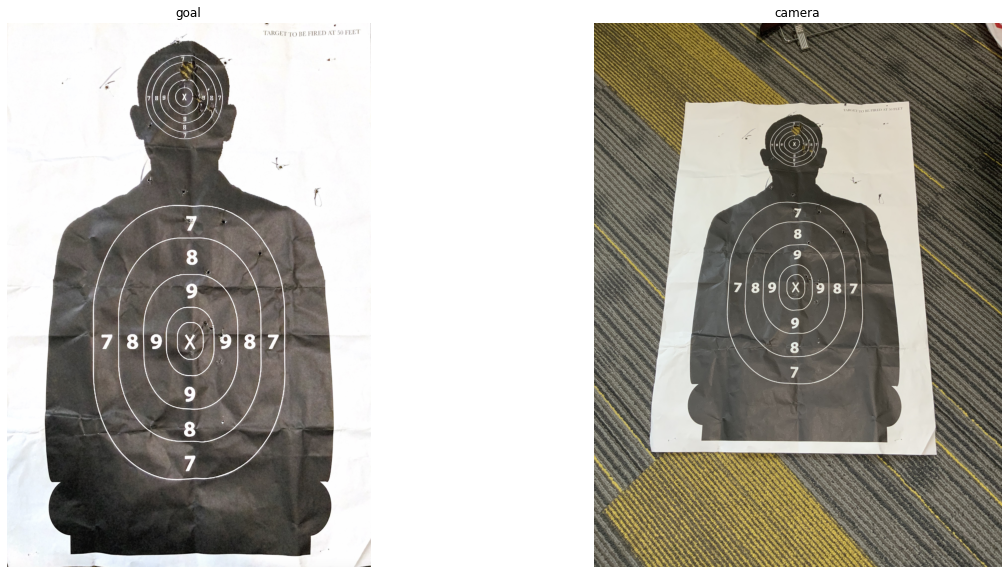

In [3]:
plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("goal")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("camera")

In [4]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

MAX_NUM_FEATURES=500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
k1, d1 = orb.detectAndCompute(im1_gray, None)
k2, d2 = orb.detectAndCompute(im2_gray, None)

im1_display = cv2.drawKeypoints(im1, k1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, k2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'camera')

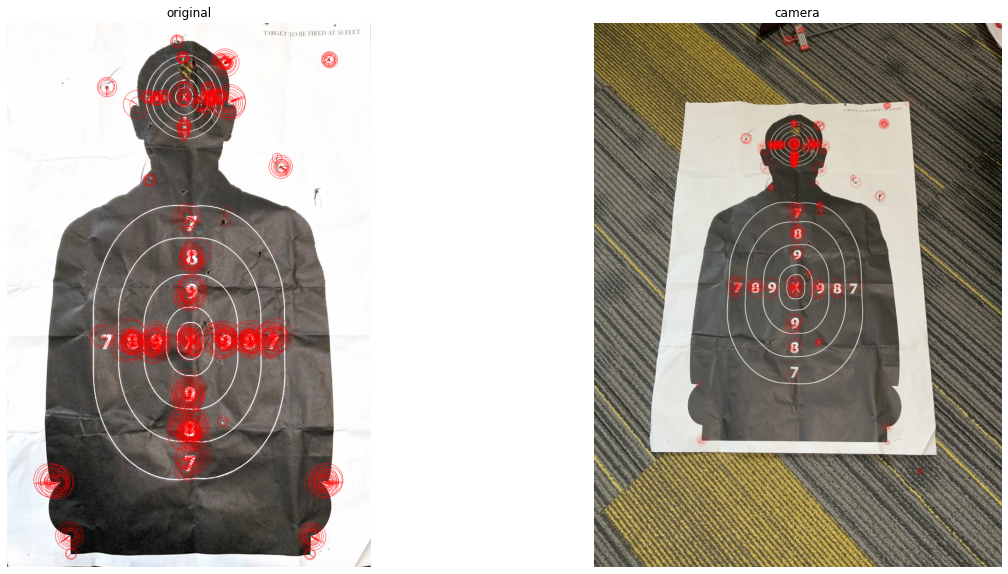

In [5]:
plt.figure(figsize=[20, 10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title('original')
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title('camera')

In [6]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(d1, d2, None))

matches.sort(key=lambda x: x.distance, reverse=False)

numGoodMatches = int(len(matches) * 0.15)
matches = matches[:numGoodMatches]

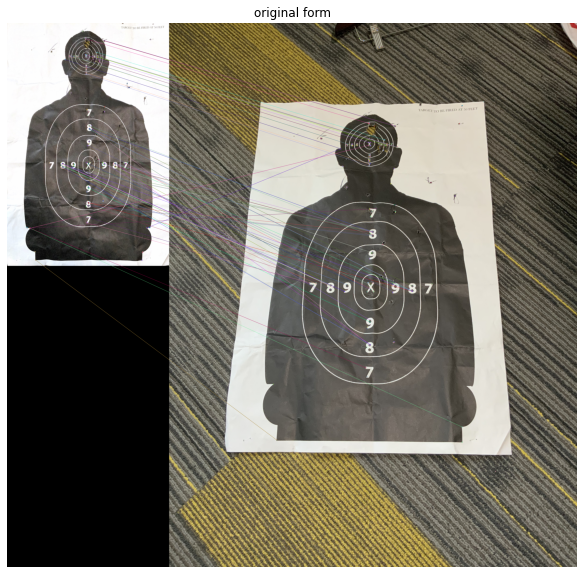

In [7]:
im_matches = cv2.drawMatches(im1, k1, im2, k2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches); plt.axis('off'); plt.title('original form');

In [8]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = k1[match.queryIdx].pt
    points2[i, :] = k2[match.trainIdx].pt
    
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print(h)

[[ 7.95135310e-01  8.32483389e-02 -6.04114301e+02]
 [ 8.39282809e-03  9.69433418e-01 -6.10297168e+02]
 [ 4.80991379e-06  1.16216819e-04  1.00000000e+00]]


In [ ]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title('goal')
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title('object')